In [208]:
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 
import pandas

In [230]:
youtube_data=pandas.read_csv('CAvideos.csv')
youtube_data

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40876,sGolxsMSGfQ,18.14.06,HOW2: How to Solve a Mystery,Annoying Orange,24,2018-06-13T18:00:07.000Z,"annoying orange|""funny""|""fruit""|""talking""|""ani...",80685,1701,99,1312,https://i.ytimg.com/vi/sGolxsMSGfQ/default.jpg,False,False,False,🚨 NEW MERCH! http://amzn.to/annoyingorange 🚨➤ ...
40877,8HNuRNi8t70,18.14.06,Eli Lik Lik Episode 13 Partie 01,Elhiwar Ettounsi,24,2018-06-13T19:01:18.000Z,"hkayet tounsia|""elhiwar ettounsi""|""denya okhra...",103339,460,66,51,https://i.ytimg.com/vi/8HNuRNi8t70/default.jpg,False,False,False,► Retrouvez vos programmes préférés : https://...
40878,GWlKEM3m2EE,18.14.06,KINGDOM HEARTS III – SQUARE ENIX E3 SHOWCASE 2...,Kingdom Hearts,20,2018-06-11T17:30:53.000Z,"Kingdom Hearts|""KH3""|""Kingdom Hearts 3""|""Froze...",773347,25900,224,3881,https://i.ytimg.com/vi/GWlKEM3m2EE/default.jpg,False,False,False,Find out more about Kingdom Hearts 3: https://...
40879,lbMKLzQ4cNQ,18.14.06,Trump Advisor Grovels To Trudeau,The Young Turks,25,2018-06-13T04:00:05.000Z,"180612__TB02SorryExcuse|""News""|""Politics""|""The...",115225,2115,182,1672,https://i.ytimg.com/vi/lbMKLzQ4cNQ/default.jpg,False,False,False,Peter Navarro isn’t talking so tough now. Ana ...


In [412]:
youtube_data.shape

(40881, 16)

In [413]:
x_data=['views','likes','dislikes','comment_count']
x=youtube_data[x_data]

In [451]:
lower_bound=0.10
upper_bound=0.95
res=x.views.quantile([lower_bound,upper_bound])
res

0.10      58675.0
0.95    4090835.0
Name: views, dtype: float64

In [452]:
filter_min=x['views']>res.iloc[0]
filter_max=x['views']<res.iloc[1]

In [453]:
x.where(filter_min & filter_max, inplace = True)
x_filtered=x.dropna()
x_data=['views','likes','dislikes']
x_clear=x_filtered[x_data]
x_clear

C:\Users\1pc\Anaconda3\lib\site-packages\pandas\core\generic.py:9276: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cond, other, inplace, axis, level, errors=errors, try_cast=try_cast


,views,likes,dislikes
1,1014651.0,127794.0,1688.0
2,3191434.0,146035.0,5339.0
3,2095828.0,132239.0,1989.0
5,1309699.0,103755.0,4613.0
6,2987945.0,187464.0,9850.0
...,...,...,...
40876,80685.0,1701.0,99.0
40877,103339.0,460.0,66.0
40878,773347.0,25900.0,224.0
40879,115225.0,2115.0,182.0


In [454]:
y_data=['comment_count']
y=x_filtered[y_data]
y

,comment_count
1,13030.0
2,8181.0
3,17518.0
5,12143.0
6,26629.0
...,...
40876,1312.0
40877,51.0
40878,3881.0
40879,1672.0


In [455]:
X_train, X_test, y_train, y_test = train_test_split(x_clear, y, test_size=0.2, random_state=42)

In [456]:
model=LinearRegression()

In [457]:
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [458]:
model.score(X_test, y_test)

0.5823268588701457

In [459]:
model.predict(X_test)

array([[1075.45465006],
       [2517.27260703],
       [ 860.35560964],
       ...,
       [2794.94658706],
       [1670.93926605],
       [6054.64740581]])

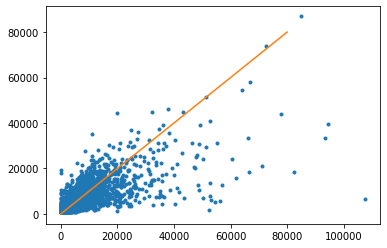

In [460]:
y_pred = model.predict(X_test) 
plt.plot(y_test, y_pred, '.')

# plot a line, a perfit predict would all fall on this line
x = np.linspace(0, 80000, 100000)
y = x
plt.plot(x, y)
plt.show()